In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

('max value at point', (18517512.0, (501, 261)))


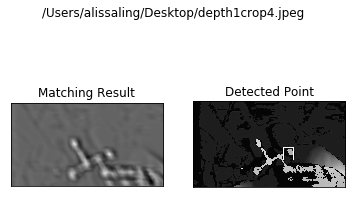

('max value at point', (19536164.0, (398, 314)))


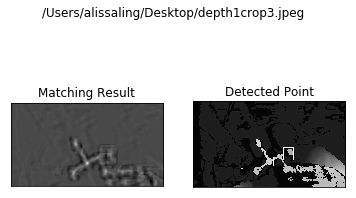

('max value at point', (22390840.0, (332, 208)))


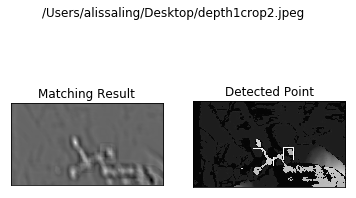

('max value at point', (29358232.0, (326, 358)))


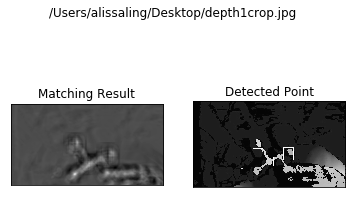

In [28]:
img = cv2.imread('/Users/alissaling/Desktop/depth1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = gray.copy()
template = cv2.imread('/Users/alissaling/Desktop/depth1crop.jpg')

templates = glob.glob('/Users/alissaling/Desktop/depth1crop*')
for t in templates:
    template = cv2.imread(t,0)
    w, h = template.shape[:2]
    res = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('max value at point', (max_val, max_loc))
    #print('min value at point', (min_val, min_loc))
    top_left = max_loc
    bottom_right = (top_left[0] +w, top_left[1]+h)

    cv2.rectangle(img2,top_left, bottom_right, 255,2)

    plt.subplot(121), plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(t)
    plt.show()

4
('max value at point', (92772504.0, (326, 358)))
('min value at point', (-30673086.0, (532, 323)))


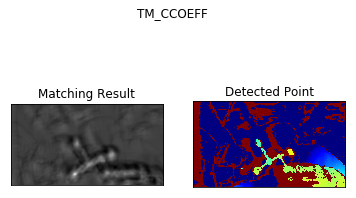

In [8]:
img = img2.copy()
method = eval('cv2.TM_CCOEFF')
print(method)
#apply template matching
res = cv2.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print('max value at point', (max_val, max_loc))
print('min value at point', (min_val, min_loc))

top_left = max_loc
bottom_right = (top_left[0] +w, top_left[1]+h)

cv2.rectangle(img,top_left, bottom_right, 255,2)

plt.subplot(121), plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img, cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('TM_CCOEFF')
plt.show()

('max value at point', (92772504.0, (326, 358)))
('min value at point', (-30673086.0, (532, 323)))


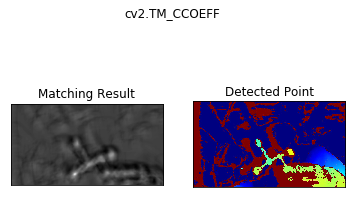

('max value at point', (0.990735650062561, (326, 358)))
('min value at point', (-0.37209150195121765, (732, 395)))


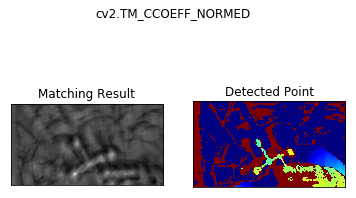

('max value at point', (205425232.0, (326, 358)))
('min value at point', (31068630.0, (208, 302)))


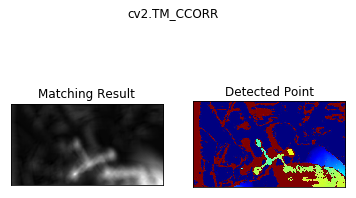

('max value at point', (0.9957427382469177, (326, 358)))
('min value at point', (0.24766626954078674, (308, 178)))


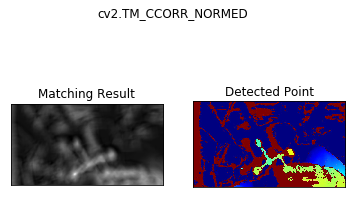

('max value at point', (339650560.0, (673, 298)))
('min value at point', (1760367.0, (326, 358)))


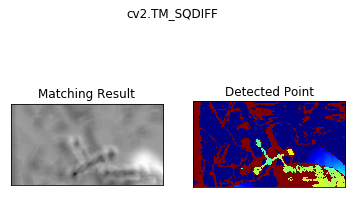

('max value at point', (1.0, (0, 0)))
('min value at point', (0.008532898500561714, (326, 358)))


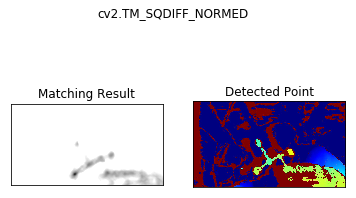

In [4]:
#all the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    #apply template matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('max value at point', (max_val, max_loc))
    print('min value at point', (min_val, min_loc))
    
    #if TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] +w, top_left[1]+h)
    
    cv2.rectangle(img,top_left, bottom_right, 255,2)
    
    plt.subplot(121), plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()